# About the dataset
 
Dataset: *eia. (2023, February 13). Cushing, OK WTI Spot Price FOB (dollars per barrel). Independent Statistics and Analysis U.S. Energy Information Administration . Retrieved 2023, from 
https://www.eia.gov/dnav/pet/hist/LeafHandler.ashx?n=PET&amp;s=RWTC&amp;f=M.*

**Data Set Information:**

>The West Texas Intermediate (WTI) is a benchmark crude oil used to price oil in the US and is one of the most commonly traded oil futures contracts in the world. The WTI oil daily average spot price is the price of a barrel of WTI crude oil delivered on a particular day at a particular location, usually at Cushing, Oklahoma. The WTI is the benchmark of North American Oil, used in both Canada and the US. 
>
>The dataset you mentioned contains information about the daily average spot prices of WTI crude oil from 1985 to 2023. The dataset may include information such as the date, daily opening price, daily closing price, high price, low price, and volume of trades.
>
>This type of dataset can be valuable for many different stakeholders in the energy industry, including oil producers, traders, and consumers, as well as policymakers and researchers interested in understanding trends and fluctuations in oil prices. It can also be useful for building predictive models, analyzing the impact of events on the oil market, and conducting various types of statistical analyses. Moreover, the dataset and the predictions can be valuable for everyday common people who are concerned about the oil prices and would want to know whether it would go up or down to be financially wiser with when they fill up their gas tank. 


**Attribute Information:**

>1. Date : month-day-year
>2. Spot-price : USD

# Importing Libraries
Before starting a project, it is crucial to get the right libraries and API's to use for analysis. Here, I will be using pandas, json, requests...

In [1]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Pre-Processing
This involves all process done before sending the data for machine learning. 

## Creating DataFrame
After importing the API, it's time to create a dataFrame to be used for analysis. Essentially, in this section, I convert the json type into a dict which contains a list of dicts which is then converted into a dataframe. 

In [2]:
# Reading csv and extracting the data to transform into a dataframe
df = pd.read_csv('Cushing_OK_WTI_Spot_Price_FOB.csv')
# Display for reference
df.head()

,Date,Price
0,2/13/23,80.14
1,2/10/23,79.74
2,2/09/23,78.04
3,2/08/23,78.47
4,2/07/23,77.17


## Preparing Data

This is the stage where the dataset is manipulated to make it fit for machine learning.  

### Cleaning the Dataset

'Cleaning' the dataset referes to identifying any null vals or duplicates that may disrupt the machine learning algorithm.

In [3]:
# No duplicates present in the dataset so no need to do anything
df.duplicated().sum()

0

In [4]:
# No null vals present in the dataset so no need to do anything
df.isna().sum()

Date     0
Price    0
dtype: int64

From both the tests, it's clear that the dataset has no duplicates or null values. 


### Feature Engineering
This part of the process just involved honing and improving its feature by either changing or manipulating them in order to gain and an accurate dataset for modeling. 

In [5]:
# First, it is important to check the type of feature(s)/label(s)
print(df.dtypes)

Date      object
Price    float64
dtype: object


In [6]:
# Convert the string (word) into a DateTime object (date)
df['Date'] = pd.to_datetime(df['Date'])
# Display for reference
df['Date']

0      2023-02-13
1      2023-02-10
2      2023-02-09
3      2023-02-08
4      2023-02-07
          ...    
9347   1986-01-08
9348   1986-01-07
9349   1986-01-06
9350   1986-01-03
9351   1986-01-02
Name: Date, Length: 9352, dtype: datetime64[ns]

Here, the 'Date' column to be a DateTime object (essentially a date) instead of a string, making it more understandable for the computer.

### Visualization

Let's start by visualizing the data and analyze/note down any interesting qualitative data. 

<Axes: xlabel='Days (2022-2023)', ylabel='Crude Oil Prices (WTI)'>

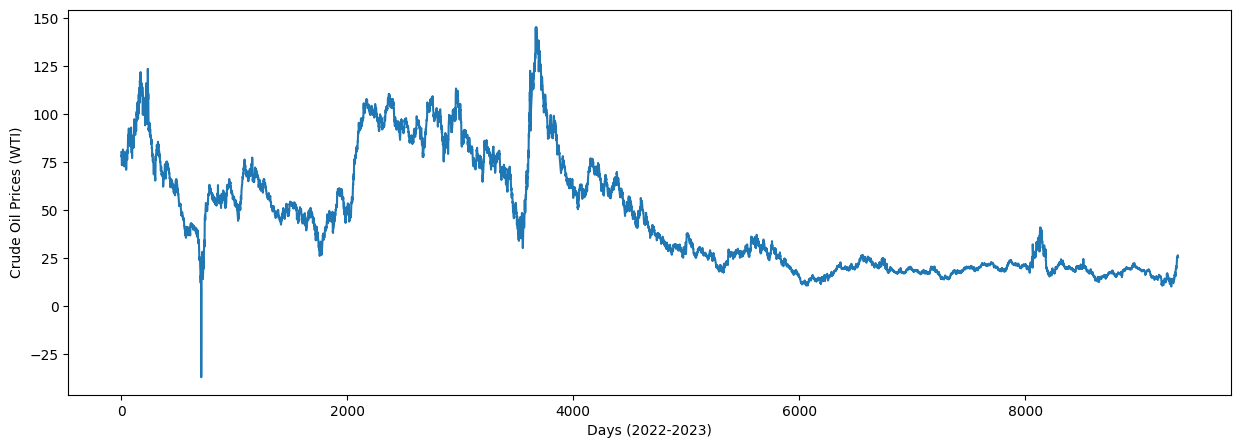

In [7]:
# Setting the text on the Y-axis
plt.ylabel("Crude Oil Prices (WTI)")
plt.xlabel("Days (2022-2023)")

# Setting the size of our graph
df.Price.plot(figsize=(15, 5))

From the visualization above, here are a few things to take note of:

* trend: non-linear, almost like a sine wave
* irregularity is present; chaotic system
* the minimum is negative; 
* the quantiles are not evenly spread out but its due to historic data


**Determining Bias**

*Selection Bias: This occurs when the data is not representative of the entire population being studied.*
> Since our data consists of the entire population, there is no bias whatsoever. 

*Measurement Bias: This occurs when the data collection method or instrument is flawed, leading to inaccurate or incomplete data.*
> In our case, there is no flaw as the measurement is regulated by the department of the government of the United States of America. 
> 
Additionally, all units are disclosed and the data is complete, thus there is no measurement bias whatsoever. 

*Reporting Bias: This occurs when the data is selectively reported or misrepresented, leading to an inaccurate or biased portrayal of the results.*
> All the findings are reported so there is no reporting bias. 

*Confirmation Bias: This occurs when researchers or analysts interpret the data in a way that confirms their preconceived beliefs or hypotheses.*
> The government has no preconceived beliefs or hypotheses therefore there is no confirmation bias.

In conclusion, there is no bias present in the dataset. 

### Splitting
Now it's time to divide up the dataset to divide up the dataset for training, validation, and testing so the machine learning can take place. 

In [8]:
# Determines the moving average for the previous 3 days
df['MA3'] = df['Price'].shift(1).rolling(window=3).mean()
# Determines the moving average for the previous 9 days
df['MA9']= df['Price'].shift(1).rolling(window=9).mean()

# Get rid of of any null values that may arise
df = df.dropna()

# Assigning X to the 2 features
X = df[['MA3','MA9']]

# Initializing y
y = df['Price']

# Splitting into 80:20
training = 0.8
t = int(training*len(df))

# Training dataset
X_train = X[:t]
y_train = y[:t]

# Testing dataset
X_test = X[t:]
y_test = y[t:]

# ML Algorithm

Algorithm in use: **Moving Average Linear Regression**

In [9]:
%%time
# Initializing model
linear_regression_model = LinearRegression()

# Fitting the training data onto the model
linear_regression_model.fit(X_train, y_train)

CPU times: total: 0 ns
Wall time: 5.97 ms


LinearRegression()

In [10]:
%%time
# Predicting the model using the X_test as input
y_pred = linear_regression_model.predict(X_test)

CPU times: total: 0 ns
Wall time: 1.93 ms


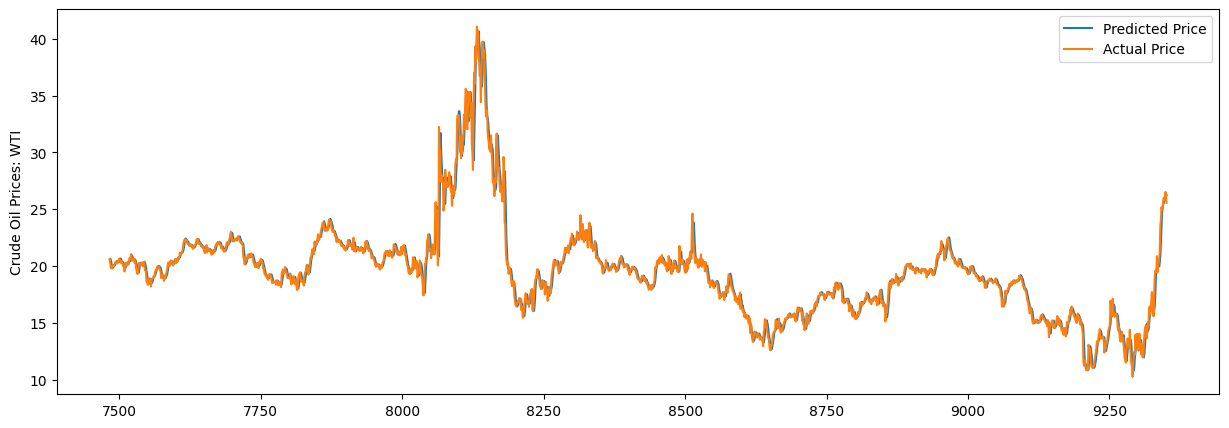

In [11]:
# Creating a dataframe of the predicted values
y_pred = pd.DataFrame(y_pred, index=y_test.index, columns = ['Price'])

# Superimpose the 2 graphs over each other for clarity
y_pred.plot(figsize=(15, 5))
y_test.plot(figsize=(15, 5))

# Legend for line colours
plt.legend(['Predicted Price','Actual Price'])
plt.ylabel("Crude Oil Prices: WTI")

# Show the graph
plt.show()

**Conclusion**

From the graph above, it is evident that the  model is extremely accurate as the predicted price nearly matches the actual price.

#### Accuracy

For reference, here are the 3 methods that are going to be utilized for finding the accuracy:

1. **`Score()`**: The `score()` method takes two parameters; one being the feature matrix (X_test) and the expected target values (y_test). Then, it compares the predictions for the feature and compares it to the target vals and returns the $R^2$ score; essentially the amount of variance between the two variables; the lower the better. 

2.   **Mean Squared Error (MSE)**: The mean squared error is the average of the squared errors, or the average squared difference between the estimated and actual values. Mathematically, it can be represented as the following equation:
> MSE = $\frac{\sum_{n=1}^{n} ({Y_i - \hat{Y_i}})^2}{n}$ where ${Y_i}$ is the original point and $\hat{Y_i}$ is the predicted value. 


3.   **Root Mean Squared Error (RMSE):** RMSE is the square root of MSE and offers a measure of the usual size of prediction mistakes in the same units as the response variable. Mathematically, it can be represented as the following equation: 
> RMSE = $\sqrt{\frac{\sum_{i=1}^{n}({x_i - \hat{x_i}})^2}{n}}$ where ${x_i}$ is the original point and $\hat{x_i}$ is the predicted value.

For the score() method, the closer the score is to 100, the better.

For the MSE and RMSE, the closer the score is to 0, the better. 

In [12]:
# Finds the score of the model on training data
linear_regression_model.score(X_train, y_train)

0.99623644658175

In [13]:
# Finds the score of the model on testing data
linear_regression_model.score(X_test, y_test)

0.9657695032263465

It is clear that our data is not overfitting since it performs nearly as good on the training data as it does on the testing data. 

In [14]:
# Mean Squared Error (MSE)
MSE = mean_squared_error(y_test, y_pred)
print(MSE)

0.5943283232160502


In [15]:
# Root Mean Squared Error (RMSE)
RMSE = math.sqrt(MSE)
print(RMSE)

0.7709269246926392


In [16]:
# Provides insight onto the raw data
raw_df = df.drop(columns=['MA3', 'MA9'])

# Displays for reference
raw_df.describe()

,Price
count,9343.000000
mean,46.104002
std,29.601199
min,-36.980000
25%,19.990000
50%,36.050000
75%,67.310000
max,145.310000


**EVALUATION:** 

It is clear that while the accuracy is extremely high (which means its a great model), it does fall short on the MSE and RMSE scores.

This suggests that the model is not the **most optimized** however, it is certainly **one of the best** for this problem. 




#### Prediction

In this section I am going to be predicting the price for February 14th; a price not listed in the dataset but can be found in the real world. Let's see how our model performs. 

In [17]:
# Data for prediction; includes the spot prices of 9 days before Feb 14th
pred_data = {'Days': [80.14, 79.74, 78.04, 78.47, 77.17, 74.11, 73.40, 75.87, 76.34]}
# Create dataframe for the predict
pred = pd.DataFrame(data=pred_data)
# Display for reference
pred.head()

,Days
0,80.14
1,79.74
2,78.04
3,78.47
4,77.17


In [18]:
# Data for prediction; includes the spot prices of 9 days before Feb 14th
pred_data = [80.14, 79.74, 78.04, 78.47, 77.17, 74.11, 73.40, 75.87, 76.34]
# Average of past 3 days
MA3_pred = (sum(pred_data[:3]) / 3) #79.30
# Average of past 9 days
MA9_pred = (sum(pred_data) / 9) #77.03 
# Append into list so it can be fed into dataframe
moving_avg = [MA3_pred, MA9_pred]
# Display for reference
moving_avg

[79.30666666666667, 77.03111111111112]

In [19]:
# Create a prediction dataframe using the averages
pred_df = pd.DataFrame(data=[moving_avg], columns=['MA3', 'MA9'])
# Display for reference
pred_df

,MA3,MA9
0,79.306667,77.031111


In [20]:
# Feed the prediction dataframe into our model
prediction = linear_regression_model.predict(pred_df)
# Print the prediction
print(prediction)

[79.58690546]


The actual price of this, which was unlisted in the dataset provided, was $79.06 and the price predicted was off by just 1%; not half bad!